📄 First 5 rows of the dataset:
   interest_level  free_hours_per_week club_participation
0               4                   17                 no
1               6                   12                 no
2               8                   19                 no
3               6                   19                yes
4               9                   17                 no

🔍 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   interest_level       100 non-null    int64 
 1   free_hours_per_week  100 non-null    int64 
 2   club_participation   100 non-null    object
dtypes: int64(2), object(1)
memory usage: 2.5+ KB
None


<ipython-input-1-69d852be13cc>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='club_participation', data=df, palette='pastel')


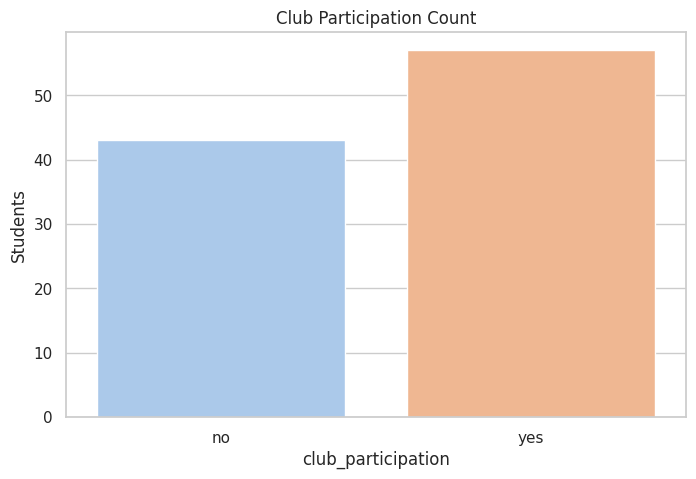

<ipython-input-1-69d852be13cc>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='club_participation', y='interest_level', data=df, palette='Set2')


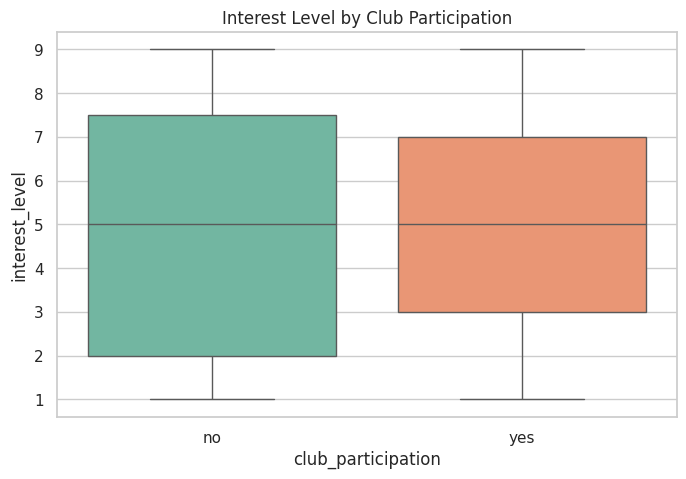

<ipython-input-1-69d852be13cc>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='club_participation', y='free_hours_per_week', data=df, palette='Set3')


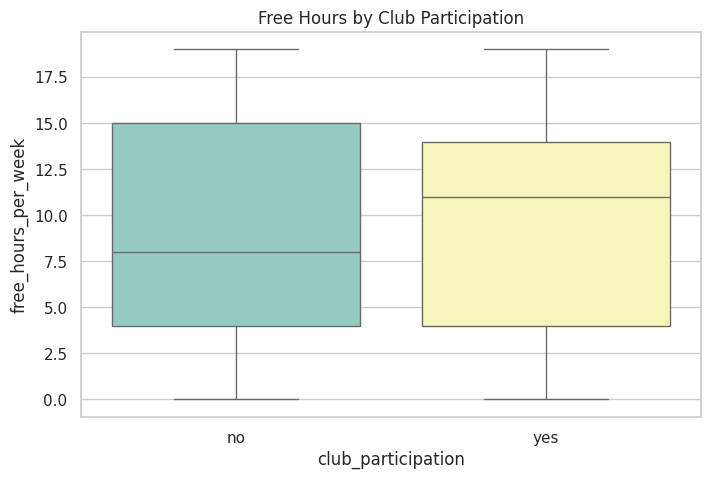

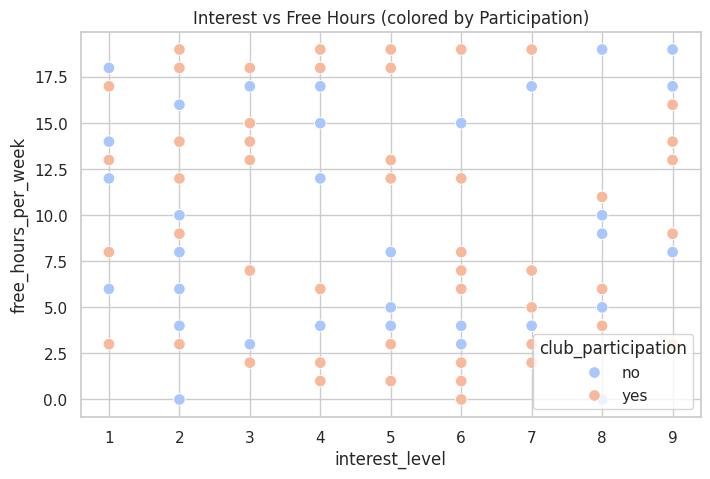


✅ Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.55      1.00      0.71        11

    accuracy                           0.55        20
   macro avg       0.28      0.50      0.35        20
weighted avg       0.30      0.55      0.39        20



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


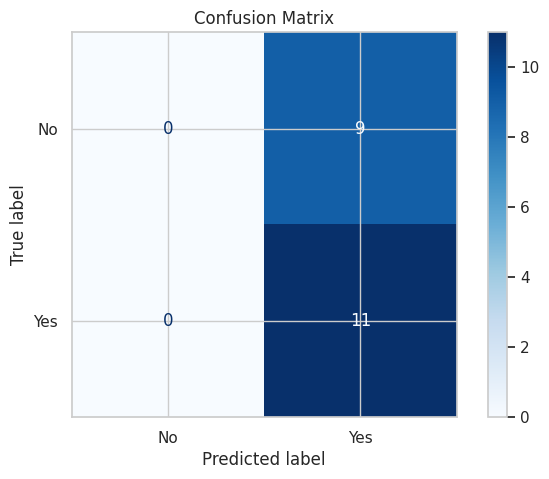

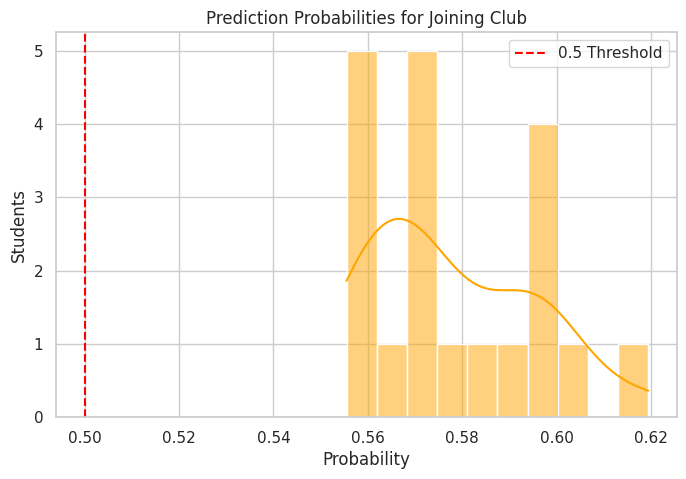

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


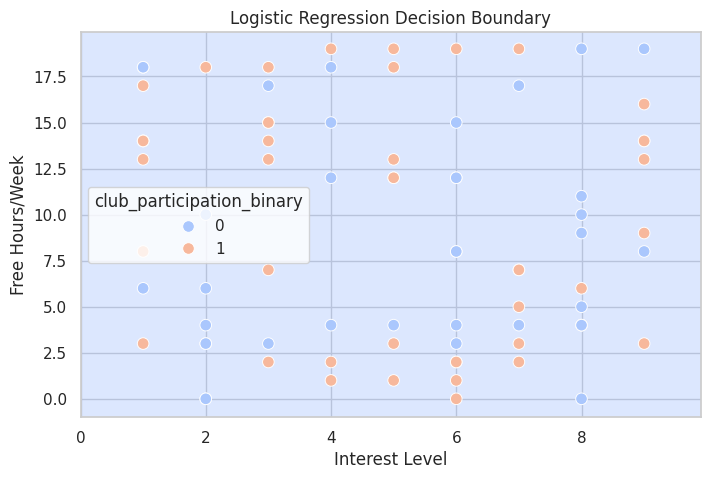

In [ ]:
# 📦 Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)

# 🔹 Load Dataset
file_path = '/content/club_participation.csv'
df = pd.read_csv(file_path)

print("📄 First 5 rows of the dataset:")
print(df.head())

print("\n🔍 Dataset Info:")
print(df.info())

# 🧹 Preprocessing
df['club_participation_binary'] = df['club_participation'].map({'yes': 1, 'no': 0})

# 🎨 Exploratory Data Analysis (Multiple Graphs)
# 1. Count plot
sns.countplot(x='club_participation', data=df, palette='pastel')
plt.title("Club Participation Count")
plt.ylabel("Students")
plt.show()

# 2. Interest level vs participation
sns.boxplot(x='club_participation', y='interest_level', data=df, palette='Set2')
plt.title("Interest Level by Club Participation")
plt.show()

# 3. Free hours vs participation
sns.boxplot(x='club_participation', y='free_hours_per_week', data=df, palette='Set3')
plt.title("Free Hours by Club Participation")
plt.show()

# 4. Scatter plot: interest vs free time
sns.scatterplot(data=df, x='interest_level', y='free_hours_per_week', hue='club_participation', palette='coolwarm', s=70)
plt.title("Interest vs Free Hours (colored by Participation)")
plt.grid(True)
plt.show()

# 🧠 Model: Logistic Regression
X = df[['interest_level', 'free_hours_per_week']]
y = df['club_participation_binary']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

print("\n✅ Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# 🔍 Prediction probabilities
y_proba = model.predict_proba(X_test)[:, 1]
sns.histplot(y_proba, bins=10, kde=True, color='orange')
plt.title("Prediction Probabilities for Joining Club")
plt.axvline(0.5, color='red', linestyle='--', label='0.5 Threshold')
plt.xlabel("Probability")
plt.ylabel("Students")
plt.legend()
plt.grid(True)
plt.show()

# 🧭 Decision Boundary Function
def plot_decision_boundary(model, X, y):
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=y, palette='coolwarm', s=70)
    plt.xlabel("Interest Level")
    plt.ylabel("Free Hours/Week")
    plt.title("Logistic Regression Decision Boundary")
    plt.grid(True)
    plt.show()

plot_decision_boundary(model, X_train, y_train)
